In [8]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/aviakompaniya/sample_submission.csv
/kaggle/input/aviakompaniya/train_dataset.csv
/kaggle/input/aviakompaniya/test_dataset.csv


In [574]:
import matplotlib.pyplot as plt
import seaborn as sns



from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score


from sklearn.ensemble import RandomForestClassifier,HistGradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from catboost import CatBoostClassifier


In [575]:
train=pd.read_csv('/kaggle/input/aviakompaniya/train_dataset.csv')
test=pd.read_csv('/kaggle/input/aviakompaniya/test_dataset.csv')
sample_submission=pd.read_csv('/kaggle/input/aviakompaniya/sample_submission.csv')

In [576]:
train.head()

,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,Male,disloyal Customer,33,Business travel,Eco,571,2,3,2,...,4,3,1,3,4,3,4,10,3.0,0
1,2,Female,Loyal Customer,49,Business travel,Business,1431,4,1,4,...,5,5,5,5,3,5,3,0,0.0,1
2,3,Female,Loyal Customer,43,Business travel,Eco,867,1,4,4,...,1,1,1,1,1,1,2,0,18.0,0
3,4,Female,Loyal Customer,27,Business travel,Business,1550,3,3,3,...,2,4,4,5,5,4,2,0,0.0,1
4,5,Male,Loyal Customer,11,Personal Travel,Eco,526,3,4,3,...,4,5,2,5,3,5,4,0,10.0,0


In [577]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 4000 non-null   int64  
 1   Gender                             4000 non-null   object 
 2   Customer Type                      4000 non-null   object 
 3   Age                                4000 non-null   int64  
 4   Type of Travel                     4000 non-null   object 
 5   Class                              4000 non-null   object 
 6   Flight Distance                    4000 non-null   int64  
 7   Inflight wifi service              4000 non-null   int64  
 8   Departure/Arrival time convenient  4000 non-null   int64  
 9   Ease of Online booking             4000 non-null   int64  
 10  Gate location                      4000 non-null   int64  
 11  Food and drink                     4000 non-null   int64

In [578]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 10000 non-null  int64  
 1   Gender                             10000 non-null  object 
 2   Customer Type                      10000 non-null  object 
 3   Age                                10000 non-null  int64  
 4   Type of Travel                     10000 non-null  object 
 5   Class                              10000 non-null  object 
 6   Flight Distance                    10000 non-null  int64  
 7   Inflight wifi service              10000 non-null  int64  
 8   Departure/Arrival time convenient  10000 non-null  int64  
 9   Ease of Online booking             10000 non-null  int64  
 10  Gate location                      10000 non-null  int64  
 11  Food and drink                     10000 non-null  int6

In [579]:
train.describe()

,id,Age,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,9972.000000,10000.000000
mean,5000.50000,39.375100,1229.556200,2.780200,3.065100,2.797800,2.981000,3.214500,3.349100,3.49140,3.402900,3.454100,3.415700,3.676200,3.360600,3.680100,3.311100,14.429900,14.709888,0.500000
std,2886.89568,14.897959,1022.281958,1.362745,1.527316,1.421168,1.283278,1.333217,1.352779,1.31122,1.331822,1.274777,1.308765,1.189746,1.258462,1.175118,1.311217,39.659674,40.046355,0.500025
min,1.00000,7.000000,31.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2500.75000,27.000000,421.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.00000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,5000.50000,40.000000,863.500000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.00000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.500000
75%,7500.25000,51.000000,1806.750000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.00000,5.000000,4.000000,5.000000,5.000000,4.000000,5.000000,4.000000,12.000000,12.000000,1.000000
max,10000.00000,80.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,921.000000,924.000000,1.000000


In [580]:
# there is something here
train[['Flight Distance','Age','Departure Delay in Minutes','Arrival Delay in Minutes']].describe()

,Flight Distance,Age,Departure Delay in Minutes,Arrival Delay in Minutes
count,10000.000000,10000.000000,10000.000000,9972.000000
mean,1229.556200,39.375100,14.429900,14.709888
std,1022.281958,14.897959,39.659674,40.046355
min,31.000000,7.000000,0.000000,0.000000
25%,421.000000,27.000000,0.000000,0.000000
50%,863.500000,40.000000,0.000000,0.000000
75%,1806.750000,51.000000,12.000000,12.000000
max,4983.000000,80.000000,921.000000,924.000000


****

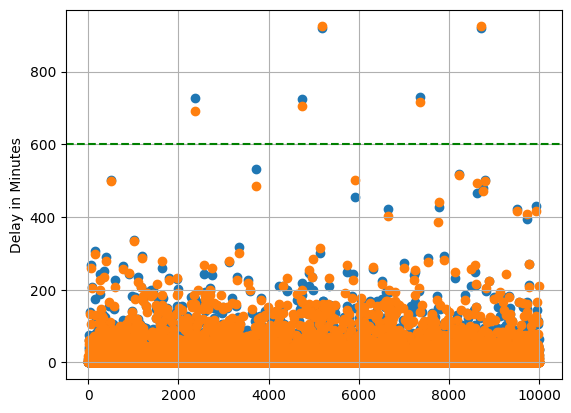

In [581]:
plt.scatter(train['id'],train['Departure Delay in Minutes'])
plt.scatter(train['id'],train['Arrival Delay in Minutes'])
plt.axhline(y=600, color='green', linestyle='--', label='Separation Line')
plt.ylabel('Delay in Minutes')
plt.grid()
plt.show()

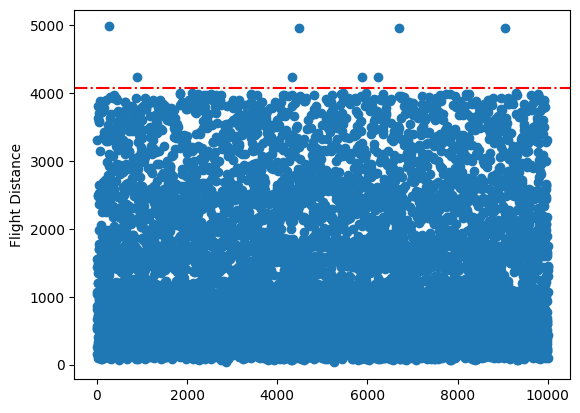

In [582]:
plt.scatter(train['id'],train['Flight Distance'])
plt.axhline(y=4070,color='red',linestyle='-.')
plt.ylabel('Flight Distance')
plt.show()

/tmp/ipykernel_33/673276311.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  age['color']=np.where(age['Age']>72, 'red', 'blue')


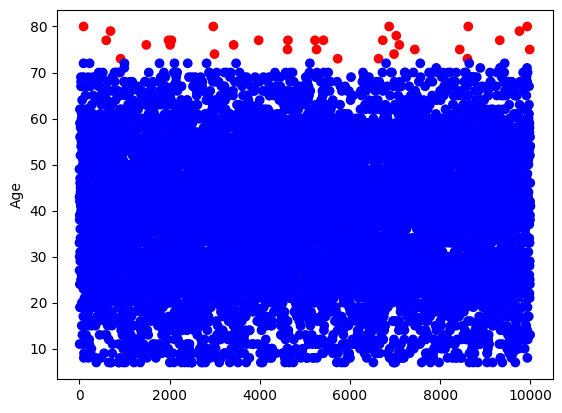

In [583]:
age=train[['id','Age']]
age['color']=np.where(age['Age']>72, 'red', 'blue')
plt.scatter(age['id'],age['Age'],color=age['color'])
plt.ylabel('Age')
plt.show()

**Data Preparation**

In [584]:

# creating new columns
train['inflight_experience_score']=train[['Seat comfort','Inflight wifi service','Food and drink',
                                          'Inflight entertainment','On-board service','Leg room service','Cleanliness']].mean(axis=1)
train['Travel Experience Score']=train[['Ease of Online booking', 
                                        'Gate location', 'Online boarding','Baggage handling']].mean(axis=1)
test['inflight_experience_score']=test[['Seat comfort','Inflight wifi service','Food and drink',
                                          'Inflight entertainment','On-board service','Leg room service','Cleanliness']].mean(axis=1)
test['Travel Experience Score']=test[['Ease of Online booking', 
                                        'Gate location', 'Online boarding','Baggage handling']].mean(axis=1)

# Filling missing values
train.fillna({'Arrival Delay in Minutes':train['Arrival Delay in Minutes'].median()},inplace=True)
test.fillna({'Arrival Delay in Minutes':test['Arrival Delay in Minutes'].median()},inplace=True)

#####################

train=train[(train['Flight Distance']<=4050)&(train['Departure Delay in Minutes']<=600)&(train['Arrival Delay in Minutes']<=600)]
# test=test[(test['Flight Distance']<=4050)&(test['Departure Delay in Minutes']<=600)&(test['Arrival Delay in Minutes']<=600)]

train.drop(['id'],axis=1,inplace=True)
test.drop('id',axis=1,inplace=True)
    


**Visualization**

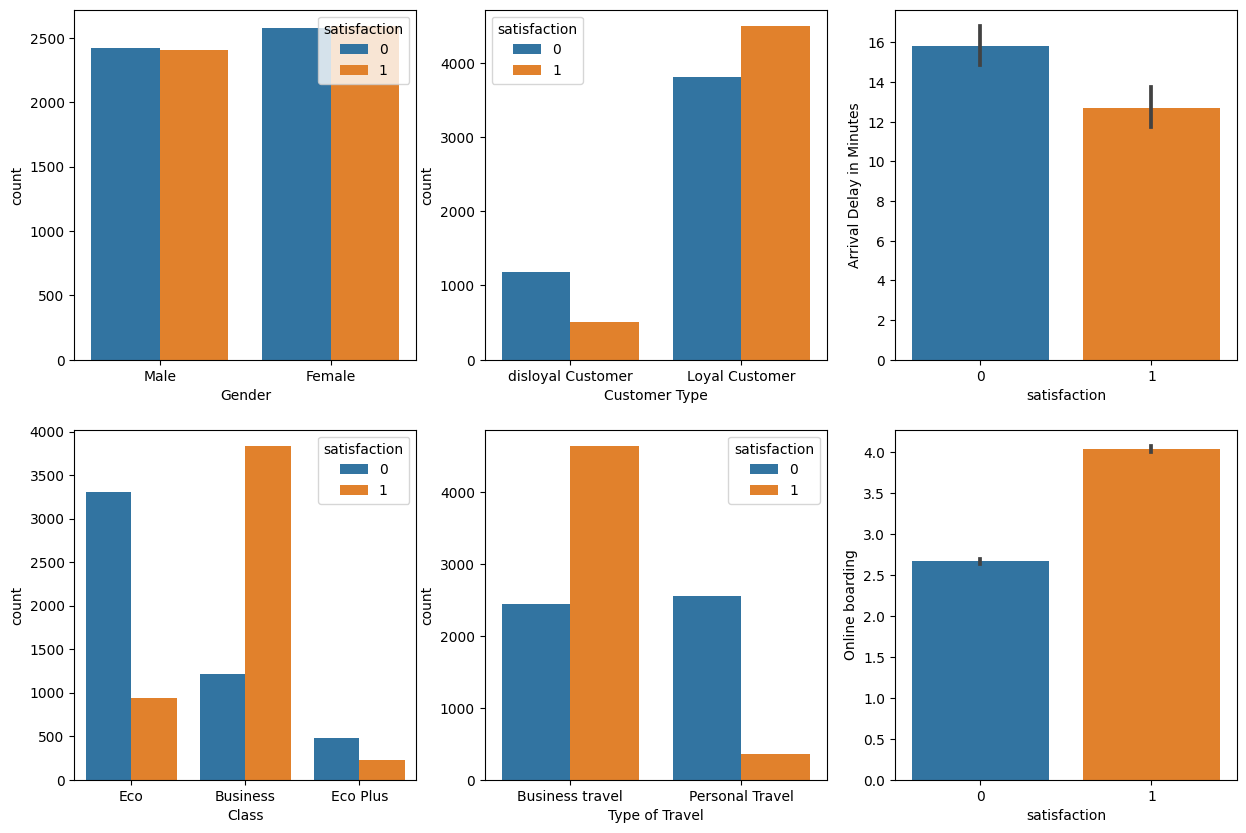

In [585]:
fig,ax=plt.subplots(2,3, figsize=(15,10))
sns.countplot(train,x='Gender',hue='satisfaction',ax=ax[0,0])
sns.countplot(train,x='Customer Type',hue='satisfaction',ax=ax[0,1])
sns.countplot(train,x='Class',hue='satisfaction',ax=ax[1,0])
sns.countplot(train,x='Type of Travel',hue='satisfaction',ax=ax[1,1])
sns.barplot(train,x='satisfaction',y='Arrival Delay in Minutes',ax=ax[0,2])
sns.barplot(train,x='satisfaction',y='Online boarding',ax=ax[1,2])

plt.show()


/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-l

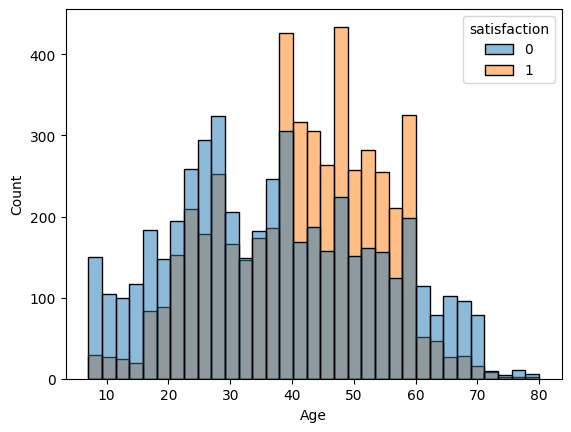

In [586]:
sns.histplot(train,x='Age',hue='satisfaction')
plt.show()

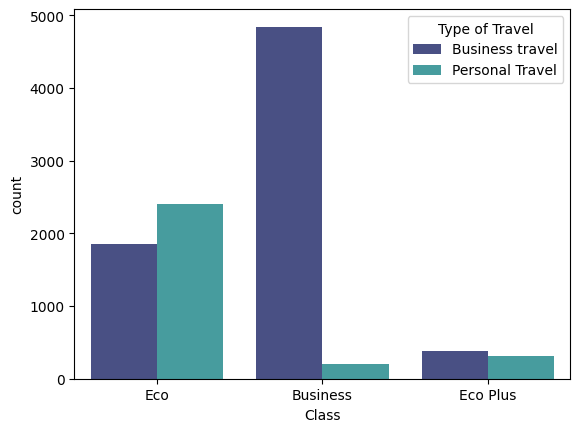

In [587]:
sns.countplot(train,x='Class',hue='Type of Travel',palette='mako')
plt.show()

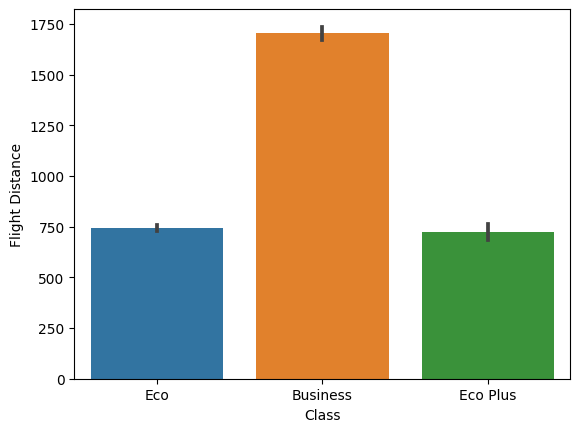

In [588]:
sns.barplot(train,x='Class',y='Flight Distance')
plt.show()

In [589]:
train=pd.get_dummies(train)
test=pd.get_dummies(test)

In [590]:
a=train.corrwith(train['satisfaction']).abs().sort_values(ascending=False)
a

satisfaction                         1.000000
Class_Business                       0.524401
Online boarding                      0.505530
inflight_experience_score            0.491176
Type of Travel_Personal Travel       0.482173
Type of Travel_Business travel       0.482173
Class_Eco                            0.478619
Inflight entertainment               0.401319
Travel Experience Score              0.376236
Seat comfort                         0.342865
On-board service                     0.326747
Leg room service                     0.325343
Cleanliness                          0.310926
Flight Distance                      0.299976
Inflight wifi service                0.277213
Baggage handling                     0.247476
Inflight service                     0.240307
Checkin service                      0.232848
Food and drink                       0.207610
Customer Type_Loyal Customer         0.181512
Customer Type_disloyal Customer      0.181512
Ease of Online booking            

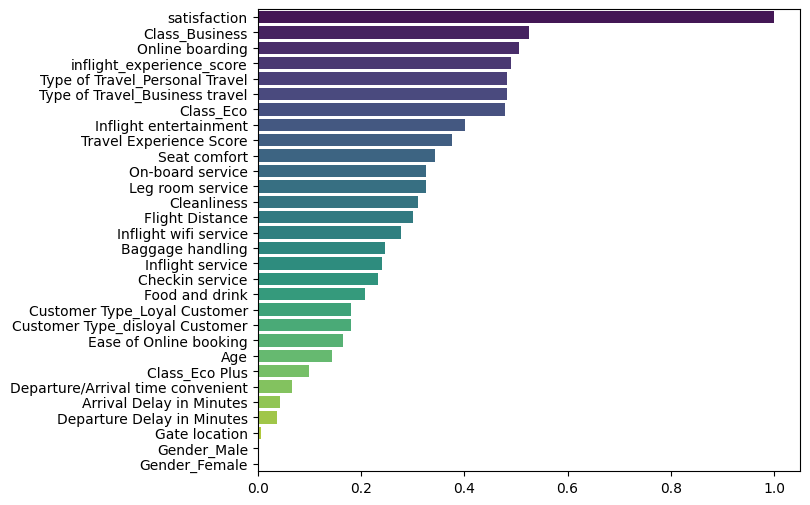

In [591]:
plt.figure(figsize=(7,6))
sns.barplot(x=a.values,y=a.index,palette='viridis')
plt.show()

In [592]:
x=train.drop('satisfaction',axis=1)
y=train[['satisfaction']]

In [593]:
# StandardScaler
ss=StandardScaler()
x=ss.fit_transform(x)
test=ss.fit_transform(test)

In [594]:
from sklearn.model_selection import train_test_split
xtr,xte,ytr,yte=train_test_split(x,y,test_size=0.20,random_state=42)

**MODELING**

**RandomForestClassifier**

/tmp/ipykernel_33/3099658080.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(xtr,ytr)


Accuracy score:
--->>> 0.9574574574574575


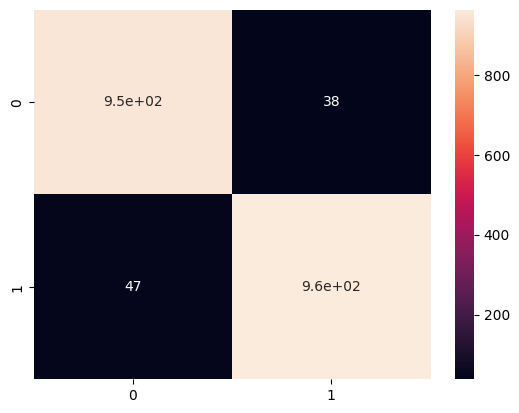

In [595]:
rf=RandomForestClassifier()
rf.fit(xtr,ytr)
pred=rf.predict(xte)
print('Accuracy score:\n--->>>',accuracy_score(yte,pred))


sns.heatmap(confusion_matrix(yte,pred),annot=True)
plt.show()

***HistGradientBoostingClassifier***

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score:
--->>> 0.9564564564564565


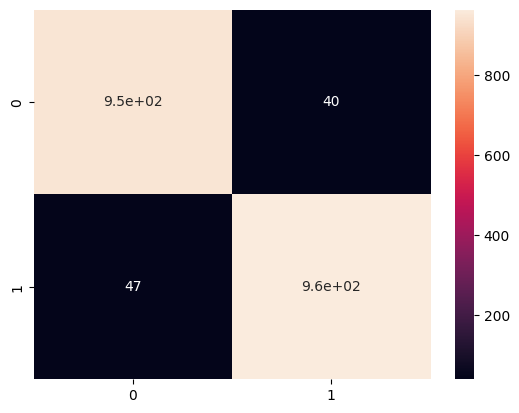

In [596]:
from sklearn.ensemble import HistGradientBoostingClassifier
a=HistGradientBoostingClassifier()
a.fit(xtr,ytr)
print('Accuracy score:\n--->>>',accuracy_score(yte,a.predict(xte)))
sns.heatmap(confusion_matrix(yte,a.predict(xte)),annot=True)
plt.show()

**SVC**

/opt/conda/lib/python3.10/site-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy score:
--->>> 0.9464464464464465


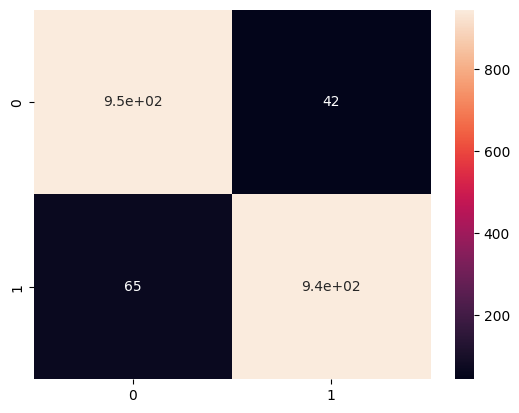

In [597]:
from sklearn.svm import SVC
sm=SVC()
sm.fit(xtr,ytr)
sm.predict(xte)
print('Accuracy score:\n--->>>',accuracy_score(yte,sm.predict(xte)))
sns.heatmap(confusion_matrix(yte,sm.predict(xte)),annot=True)
plt.show()

**XGBClassifier**

Accuracy score:
--->>> 0.9544544544544544


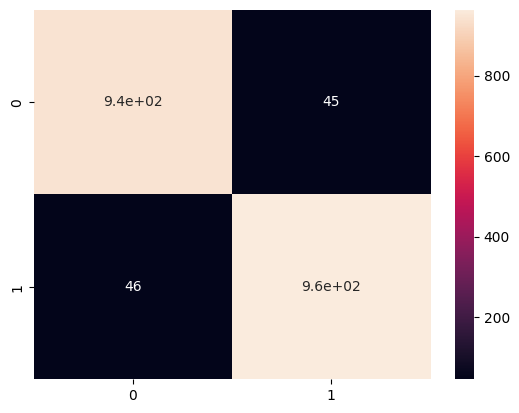

In [598]:
from xgboost import XGBClassifier
xgb_model = XGBClassifier()
xgb_model.fit(xtr,ytr)
xgb_model.predict(xte)
print('Accuracy score:\n--->>>',accuracy_score(yte,xgb_model.predict(xte)))
sns.heatmap(confusion_matrix(yte,xgb_model.predict(xte)),annot=True)
plt.show()

**CatBoostClassifier**

Accuracy score:
--->>> 0.9574574574574575


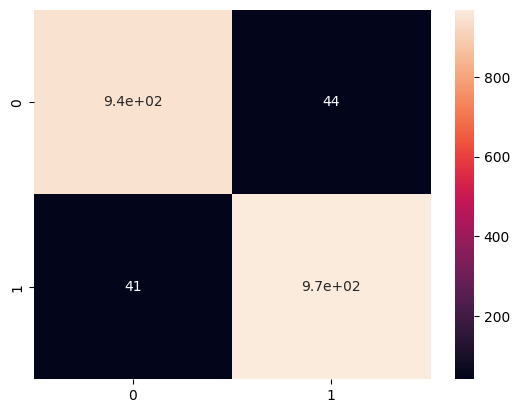

In [599]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(verbose=False)
cat.fit(xtr,ytr)
print('Accuracy score:\n--->>>',accuracy_score(yte,cat.predict(xte)))
sns.heatmap(confusion_matrix(yte,cat.predict(xte)),annot=True)
plt.show()

In [600]:
from catboost import CatBoostClassifier
cat=CatBoostClassifier(verbose=False)
cat.fit(x,y)
y_pred=cat.predict(test)


In [561]:
sample_submission.head()

,id,satisfaction
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


In [602]:
sub=pd.DataFrame({'id':sample_submission.id,'satisfaction':y_pred})
sub.to_csv('submisisss',index=False)